## 0. Install and Import Dependencies

In [54]:
!pip install ultralytics==8.2.3


     ---------------------------------------- 0.0/40.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/40.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/40.4 kB ? eta -:--:--
     -------------------- ------------------- 20.5/40.4 kB ? eta -:--:--
     -------------------- ------------------- 20.5/40.4 kB ? eta -:--:--
     -------------------- ------------------- 20.5/40.4 kB ? eta -:--:--
     -------------------- ------------------- 20.5/40.4 kB ? eta -:--:--
     -------------------- ------------------- 20.5/40.4 kB ? eta -:--:--
     -------------------- ------------------- 20.5/40.4 kB ? eta -:--:--
     -------------------- ------------------- 20.5/40.4 kB ? eta -:--:--
     ----------------------------- --------- 30.7/40.4 kB 72.9 kB/s eta 0:00:01
     ----------------------------- --------- 30.7/40.4 kB 72.9 kB/s eta 0:00:01
     ----------------------------- --------- 30.7/40.4 kB 72.9 kB/s eta 0:00:01
     ----------------------------

In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import ultralytics
ultralytics.__version__

'8.2.3'

In [121]:
!python predictWithOCRg42.py model='runs/detect/train/weights/best.pt' source="demo.mp4"

Traceback (most recent call last):
  File "e:\FYP\Ai Model Training\Licence-Plate-Detection-using-YOLO-V8-main\predictWithOCRg42.py", line 5, in <module>
    from ultralytics.yolo.utils import DEFAULT_CONFIG, ROOT, ops
ModuleNotFoundError: No module named 'ultralytics.yolo'


In [2]:
%pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import matplotlib.pyplot as plt
import pytesseract

In [3]:
import numpy as np

In [3]:
import easyocr

: 

In [3]:
!pip install imutils

^C


In [4]:
import imutils

## 1. Read in Image, Grayscale and Blur

In [40]:
import re
import string

img = cv2.imread('cartest10.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#change color code to gray scale why?
# plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) #plt.imshow() is used to display the grayscale image using cv2.cvtColor() to convert it back to the RGB color space for correct visualization.

bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
# plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)#This cell finds contours in the edge image edged using cv2.findContours(). The cv2.RETR_TREE retrieval mode and cv2.CHAIN_APPROX_SIMPLE contour approximation method are used.
contours = imutils.grab_contours(keypoints) #used to extract the contours from the keypoints result
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #The contours are then sorted based on their area using sorted() and the cv2.contourArea() function. Only the largest 10 contours are selected.

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)#For each contour, cv2.approxPolyDP() is used to approximate the polygonal curve of the contour with a specified precision (10 in this case). The approximation result is stored in the approx variable.
    if len(approx) == 4: #If the approximation has exactly four vertices (indicating a rectangular shape, which is expected for a license plate)
        location = approx
        break

location

mask = np.zeros(gray.shape, np.uint8) #This cell creates a black mask image (np.zeros(gray.shape, np.uint8)) with the same shape as the grayscale image gray.
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

#The contour stored in the location variable (which represents the license plate) is drawn on the mask image using cv2.drawContours(). The contour is specified as a list with a single element [location].
#The contour is filled with white color (value 255) using -1 as the thickness argument to cv2.drawContours().
#The original image img is bitwise ANDed with the mask image mask using cv2.bitwise_and(). This operation keeps only the pixels within the license plate region and sets the rest to black.
#Finally, plt.imshow() is used to display the resulting image after converting it back to the RGB color space.

# plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

(x,y) = np.where(mask==255)#This line finds the coordinates where the mask image has pixel values equal to 255 (white color). The np.where() function returns two arrays, x and y, representing the row and column indices of the white pixels, respectively.
#These lines calculate the minimum and maximum values of the x and y arrays, which correspond to the top-left and bottom-right coordinates of the bounding box enclosing the license plate region, respectively. (x1, y1) represents the top-left coordinate, and 
#(x2, y2) represents the bottom-right coordinate.
# 255 (white), where white pixels represent the region of interest (license plate) and black pixels represent the rest of the image.
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]# It creates a new image (cropped_image) containing only the pixels within the bounding box coordinates (x1, y1) and (x2, y2). The x1:x2+1 range includes the rows from x1 to x2, and
#y1:y2+1 includes the columns from y1 to y2.


pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"


text = pytesseract.image_to_string(cropped_image, lang="eng").strip()

# Sanitize the text to create a valid file name
valid_chars = "-_.() %s%s" % (string.ascii_letters, string.digits)
text = ''.join(c for c in text if c in valid_chars)
text = re.sub(r'\s+', '_', text)  # Replace whitespace with underscores
text = text[:255]  # Limit the filename length to 255 characters (max for most filesystems)

# Specify output file paths
output_file_text = "output2.txt"
output_file_image = f'detected_license/{text}.jpg'

# Save the cropped image
cv2.imwrite(output_file_image, cropped_image)
print("Image saved to:", output_file_image)

# Write the recognized text to the output file
with open(output_file_text, "a", encoding="utf-8") as file:
    file.write(text + '\n')  # Add a newline after each text

print("Text saved to:", output_file_text)


Image saved to: detected_license/MH20CS9817.jpg
Text saved to: output2.txt


## 2. Apply filter and find edges for localization

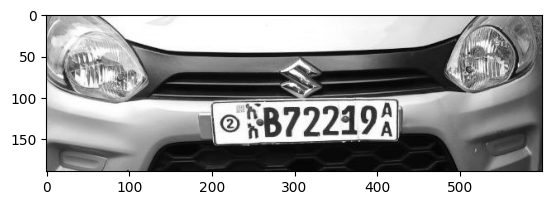

In [19]:
img = cv2.imread('car9.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#change color code to gray scale why?
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) #plt.imshow() is used to display the grayscale image using cv2.cvtColor() to convert it back to the RGB color space for correct visualization.

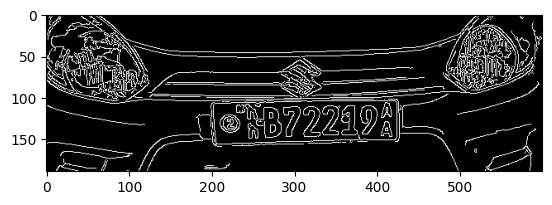

In [20]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

In [21]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)#This cell finds contours in the edge image edged using cv2.findContours(). The cv2.RETR_TREE retrieval mode and cv2.CHAIN_APPROX_SIMPLE contour approximation method are used.
contours = imutils.grab_contours(keypoints) #used to extract the contours from the keypoints result
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #The contours are then sorted based on their area using sorted() and the cv2.contourArea() function. Only the largest 10 contours are selected.

In [22]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)#For each contour, cv2.approxPolyDP() is used to approximate the polygonal curve of the contour with a specified precision (10 in this case). The approximation result is stored in the approx variable.
    if len(approx) == 4: #If the approximation has exactly four vertices (indicating a rectangular shape, which is expected for a license plate)
        location = approx
        break

In [23]:
location

array([[[424, 106]],

       [[421, 151]],

       [[205, 154]],

       [[204, 107]]], dtype=int32)

In [24]:
mask = np.zeros(gray.shape, np.uint8) #This cell creates a black mask image (np.zeros(gray.shape, np.uint8)) with the same shape as the grayscale image gray.
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

#The contour stored in the location variable (which represents the license plate) is drawn on the mask image using cv2.drawContours(). The contour is specified as a list with a single element [location].
#The contour is filled with white color (value 255) using -1 as the thickness argument to cv2.drawContours().
#The original image img is bitwise ANDed with the mask image mask using cv2.bitwise_and(). This operation keeps only the pixels within the license plate region and sets the rest to black.
#Finally, plt.imshow() is used to display the resulting image after converting it back to the RGB color space.

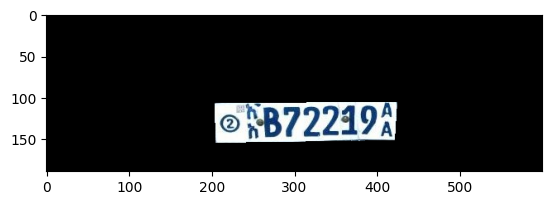

In [25]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

The code snippet you provided is used to crop the region of interest from

In [26]:
(x,y) = np.where(mask==255)#This line finds the coordinates where the mask image has pixel values equal to 255 (white color). The np.where() function returns two arrays, x and y, representing the row and column indices of the white pixels, respectively.
#These lines calculate the minimum and maximum values of the x and y arrays, which correspond to the top-left and bottom-right coordinates of the bounding box enclosing the license plate region, respectively. (x1, y1) represents the top-left coordinate, and 
#(x2, y2) represents the bottom-right coordinate.
# 255 (white), where white pixels represent the region of interest (license plate) and black pixels represent the rest of the image.
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]# It creates a new image (cropped_image) containing only the pixels within the bounding box coordinates (x1, y1) and (x2, y2). The x1:x2+1 range includes the rows from x1 to x2, and
#y1:y2+1 includes the columns from y1 to y2.

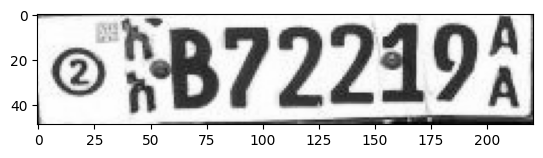

In [27]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [28]:
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [29]:
import re
import string


text = pytesseract.image_to_string(cropped_image, lang="eng").strip()

# Sanitize the text to create a valid file name
valid_chars = "-_.() %s%s" % (string.ascii_letters, string.digits)
text = ''.join(c for c in text if c in valid_chars)
text = re.sub(r'\s+', '_', text)  # Replace whitespace with underscores
text = text[:255]  # Limit the filename length to 255 characters (max for most filesystems)

# Specify output file paths
output_file_text = "output2.txt"
output_file_image = f'detected_license/{text}.jpg'

# Save the cropped image
cv2.imwrite(output_file_image, cropped_image)
print("Image saved to:", output_file_image)

# Write the recognized text to the output file
with open(output_file_text, "a", encoding="utf-8") as file:
    file.write(text + '\n')  # Add a newline after each text

print("Text saved to:", output_file_text)

Image saved to: detected_license/OBZ2219.jpg
Text saved to: output2.txt


In [21]:


# Set the path to the Tesseract OCR executable
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Load the cropped license plate image
cropped_image = cv2.imread("car9s.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to convert to binary image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize the recognized text variable
recognized_text = ""

# Iterate over each contour
for contour in contours:
    # Get the bounding box coordinates of the contour
    x, y, w, h = cv2.boundingRect(contour)

    # Crop the character region from the image
    character_img = cropped_image[y:y+h, x:x+w]

    # Perform OCR on the character image
    character_text = pytesseract.image_to_string(character_img, lang="eng")

    # Check if the recognized text is English
    if character_text.isascii():
        # Append the recognized character to the overall recognized text
        recognized_text += character_text

        # Display the cropped character image
        cv2.imshow("Character", character_img)
        cv2.waitKey(0)

# Print the recognized text
print(recognized_text)

# Save the recognized text to the output file
output_file = "output2.txt"
with open(output_file, "w", encoding="utf-8") as file:
    file.write(recognized_text)

print("Text saved to:", output_file)

# Close all windows
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


: 

## 4. Use Easy OCR To Read Text

In [19]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


URLError: <urlopen error [WinError 10061] No connection could be made because the target machine actively refused it>

## 5. Render Result

In [18]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

NameError: name 'result' is not defined

In [33]:
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"
img = cv2.imread("test1tes.jpg")
# cv2.imshow("img", img)
text = pytesseract.image_to_string(img, lang="amh+eng")

output_file = "output.txt"

# Write the recognized text to the output file
with open(output_file, "w", encoding="utf-8") as file:
    file.write(text)

print("Text saved to:", output_file)
print(text)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

Text saved to: output.txt
ናትናኤል ብርሃኑ



In [ ]:
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"
img = cv2.imread("test1tes.jpg")
cv2.imshow("img", img)
text = pytesseract.image_to_string(img, lang="amh+eng")

output_file = "output.txt"

# Write the recognized text to the output file
with open(output_file, "w", encoding="utf-8") as file:
    file.write(text)

print("Text saved to:", output_file)
print(text)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'pytesseract' is not defined

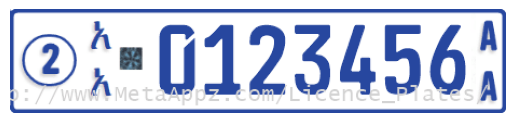

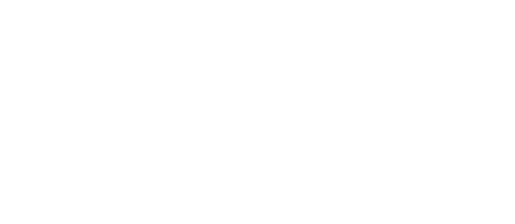

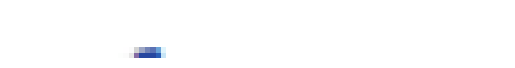

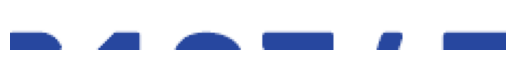

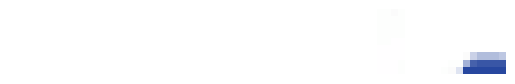

Circle Part Text: OO
Amharic Letters Text: —
Number Part Text: — © see oe le
Letters Part Text: _


In [12]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Load the image
image_path = 'test3.png'
image = cv2.imread(image_path)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Get the dimensions of the image
height, width, _ = image.shape

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define relative coordinates for each part (as a fraction of width/height)
relative_coords = {
    "circle": (0.02, 0.05, 0.1, 0.2),  # Example: (x, y, width, height) as fractions
    "amharic": (0.12, 0.05, 0.2, 0.1),
    "number": (0.32, 0.05, 0.5, 0.2),
    "letters": (0.82, 0.05, 0.15, 0.1)
}

def get_absolute_coords(relative_coords, width, height):
    """Convert relative coordinates to absolute coordinates."""
    x_rel, y_rel, w_rel, h_rel = relative_coords
    x_abs = int(x_rel * width)
    y_abs = int(y_rel * height)
    w_abs = int(w_rel * width)
    h_abs = int(h_rel * height)
    return x_abs, y_abs, w_abs, h_abs

def extract_text_from_part(image, relative_coords, width, height):
    x, y, w, h = get_absolute_coords(relative_coords, width, height)
    part_image = image[y:y+h, x:x+w]
    text = pytesseract.image_to_string(part_image, config='--psm 7')
    plt.imshow(cv2.cvtColor(part_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    return text.strip()

# Extract text from each part
circle_text = extract_text_from_part(image, relative_coords["circle"], width, height)
amharic_text = extract_text_from_part(image, relative_coords["amharic"], width, height)
number_text = extract_text_from_part(image, relative_coords["number"], width, height)
letters_text = extract_text_from_part(image, relative_coords["letters"], width, height)

print("Circle Part Text:", circle_text)
print("Amharic Letters Text:", amharic_text)
print("Number Part Text:", number_text)
print("Letters Part Text:", letters_text)

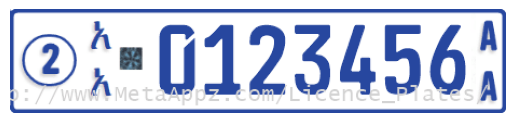

Image dimensions: 460x96


In [14]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

# Load the image
image_path = 'test3.png'
image = cv2.imread(image_path)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Get the dimensions of the image
height, width, _ = image.shape
print(f"Image dimensions: {width}x{height}")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define relative coordinates for each part (as a fraction of width/height)
relative_coords = {
    "circle": (0.01, 0.05, 0.1, 0.9),  # Example: (x, y, width, height) as fractions
    "amharic": (0.12, 0.05, 0.2, 0.9),
    "number": (0.32, 0.05, 0.5, 0.9),
    "letters": (0.82, 0.05, 0.15, 0.9)
}

def get_absolute_coords(relative_coords, width, height):
    """Convert relative coordinates to absolute coordinates."""
    x_rel, y_rel, w_rel, h_rel = relative_coords
    x_abs = int(x_rel * width)
    y_abs = int(y_rel * height)
    w_abs = int(w_rel * width)
    h_abs = int(h_rel * height)
    return x_abs, y_abs, w_abs, h_abs

def extract_text_from_part(image, relative_coords, width, height):
    x, y, w, h = get_absolute_coords(relative_coords, width, height)
    part_image = image[y:y+h, x:x+w]
    # Display the part of the image being processed
    plt.imshow(cv2.cvtColor(part_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Extracted Part - x:{x}, y:{y}, w:{w}, h:{h}")
    plt.axis('off')
    plt.show()
    text = plt

In [19]:
# prompt: i want to detect and recognize a lice plate from a video file

# import cv2
# import easyocr
# from matplotlib import pyplot as plt

# Load the video
video_path = "demo.mp4"
cap = cv2.VideoCapture(video_path)

# Initialize the license plate detector
plate_detector = easyocr.Reader(['en'])

while cap.isOpened():
    # Read the frame
    ret, frame = cap.read()

    # Preprocess the frame
    frame = imutils.resize(frame, width=600)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Detect license plates
    plates = plate_detector.readtext(blur)

    # Draw the license plates on the frame
    for plate in plates:
        (x, y, w, h) = plate[0]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, plate[1], (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 255, 0), 3)

    # Display the frame
    cv2.imshow("Frame", frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture
cap.release()
cv2.destroyAllWindows()


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


4) Preprocess image plate beforee ocr

In [42]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

In [46]:


# Load image and convert to grayscale
img = cv2.imread('cartest2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Noise reduction and edge detection
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)

# Find contours
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

# Find the contour with 4 vertices
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

# Create mask and extract license plate
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

# Crop the license plate region
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

# Preprocess cropped image for character segmentation
_, thresh = cv2.threshold(cropped_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thresh = cv2.bitwise_not(thresh)

# Find contours of each character
char_contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
bounding_boxes = []

for cnt in char_contours:
    (x, y, w, h) = cv2.boundingRect(cnt)
    aspect_ratio = w / float(h)
    if 0.2 < aspect_ratio < 1.0 and 100 < cv2.contourArea(cnt) < 1000:  # Filtering based on size and aspect ratio
        bounding_boxes.append((x, y, w, h))

# Draw bounding boxes around characters
# for (x, y, w, h) in bounding_boxes:
#     cv2.rectangle(cropped_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
# plt.show()

# Recognize characters using Tesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
text = pytesseract.image_to_string(cropped_image, lang="eng")
print(text)

# Save recognized text to file
output_file = "output2.txt"
with open(output_file, "w", encoding="utf-8") as file:
    file.write(text)

print("Text saved to:", output_file)

cv2.imshow("Cropped Image with Bounding Boxes", cropped_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



Text saved to: output2.txt
